<h1>Содержание проекта по анализу данных<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Исследование 

Цель: определить органический и постоянный трафик ресторана
Данные: открытые данные по заведениям общественного питания в Москве
Задача: определить улицы с сетевыми и несетевыми заведениями, выявить эти улицы, визуализировать данные по улицам, заведениям и числу посадочных мест 


## Изучение данных из файла

In [1]:
#загружаем библиотеки
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from scipy import stats as st
import math
import warnings
from scipy.stats import levene
import seaborn as sns
from numpy import median
import sys
!{sys.executable} -m pip install plotly
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
#читаем данные из файла
df = pd.read_csv('https://www.dropbox.com/s/8dercedyvk0wixy/rest_data.csv?dl=1')

## Предобработка данных

отфильтруем фрейм. Удалим все строки с числом посадочных мест равным нулю, кроме предприятий быстрого обслуживания.

In [3]:
df[df['number'] == 0]['object_type'].value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

In [4]:
#удаляем все аномальные строки где посадочные места равны 0 и тип заведения НЕ предприятия быстрого обслуживания
#df = df.drop(np.where((df['number'] == 0) & (df['object_type'] != 'предприятие быстрого обслуживания'))[0])

In [5]:
#определяем наличие дубликатов в данных


df['object_name'] = df['object_name'].str.lower()
display(df)
df.duplicated().value_counts()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


False    15366
dtype: int64

In [6]:
#считаем число видов объектов и число заведений в каждом виде
df.groupby('object_type').count().reset_index()

,object_type,id,object_name,chain,address,number
0,бар,856,856,856,856,856
1,буфет,585,585,585,585,585
2,закусочная,360,360,360,360,360
3,кафе,6099,6099,6099,6099,6099
4,кафетерий,398,398,398,398,398
5,магазин (отдел кулинарии),273,273,273,273,273
6,предприятие быстрого обслуживания,1923,1923,1923,1923,1923
7,ресторан,2285,2285,2285,2285,2285
8,столовая,2587,2587,2587,2587,2587


In [7]:
# проверяем  данные на предмет пропусков
print('в данных', df.isna().sum(axis=1).sum(), 'пропусков')

в данных 0 пропусков


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


пропущенные данные в поле с адресом, всего 130 строк. Очистим данные

In [9]:
df = df.dropna()

пропущенных данных нет. Проверим данные на корректность.

Всего 9 типов заведений.

Поле chain содержит адекватные значения. Теперь попробуем найти неявные дубликаты

In [10]:
df.duplicated().value_counts()

False    15366
dtype: int64

Явных дубликатов не обнаружено. Проверим на дубликаты выборочно по полям с объектами, типами, адресом. 

In [11]:
print('до', df.info())
df = df.drop_duplicates(subset=['object_name','object_type','address'])
print('после', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 840.3+ KB
до None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15182 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15182 non-null  int64 
 1   object_name  15182 non-null  object
 2   chain        15182 non-null  object
 3   object_type  15182 non-null  object
 4   address      15182 non-null  object
 5   number       15182 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 830.3+ KB
после None


Рассмотрим данные о числе посадочных мест

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15182 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15182 non-null  int64 
 1   object_name  15182 non-null  object
 2   chain        15182 non-null  object
 3   object_type  15182 non-null  object
 4   address      15182 non-null  object
 5   number       15182 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 830.3+ KB


### Вывод

данные предобработаны и готовы к анализу

## Расчёты и добавление результатов в таблицу

In [13]:
rest_counts = df.object_type.value_counts() #вводим переменную. с количеством заведений по каждому типу

рассмотрим соотношение видов объектов

In [14]:
rest_counts = rest_counts.to_frame() #делаем фрейм из серии

### Вывод

фрейм с общим числом в разрезе типов заведений создан, данные готовы к исследовательскому анализу

## Исследовательский и статистический анализ данных

In [15]:
#создаём столбец с отношением каждого типа заведения от общего числа
rest_counts['part'] = rest_counts['object_type'] / rest_counts['object_type'].sum()
rest_counts

,object_type,part
кафе,6008,0.395732
столовая,2575,0.169609
ресторан,2274,0.149783
предприятие быстрого обслуживания,1890,0.124490
бар,853,0.056185
буфет,570,0.037544
кафетерий,393,0.025886
закусочная,347,0.022856
магазин (отдел кулинарии),272,0.017916


Строим фигуру с частями по видам заведений (от целого) с помощью сиборна

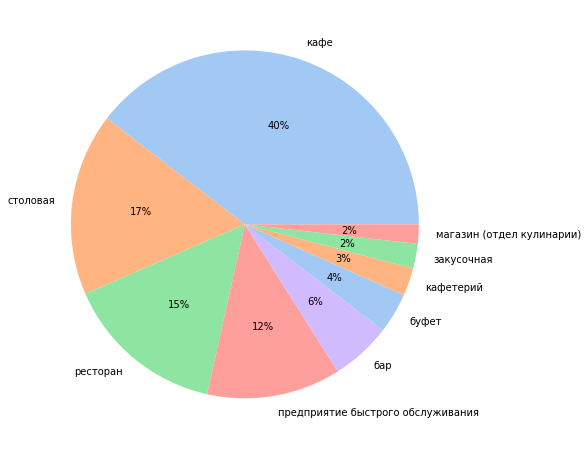

In [16]:
plt.figure(figsize = (15,8))

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(rest_counts['part'], colors = colors,autopct='%1.0f%%', labels = rest_counts.index)
plt.show()

определяем доли рынка общепита Москвы (сетевые и несетевые)

In [17]:
chain_part = df['chain'].value_counts()
chain_part = chain_part.to_frame()

In [18]:
chain_part['part'] = chain_part['chain'] / chain_part['chain'].sum() #находим отношение частного к общему

In [19]:
chain_part

,chain,part
нет,12234,0.805823
да,2948,0.194177


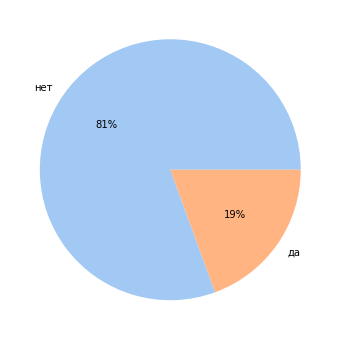

In [20]:
plt.figure(figsize = (15,6))
plt.pie(chain_part['part'], colors = colors, autopct='%1.0f%%', labels = chain_part.index)
plt.show()

рассмотрим сегмент сетевых заведений для оценки характерных видов

In [21]:
#создаём срезы данных сетевые и несетевые 
df_chain_yes = df.query('chain == "да"')
df_chain_yes = df_chain_yes['object_type'].value_counts().to_frame().reset_index()
df_chain_not = df.query('chain == "нет"')
df_chain_not = df_chain_not['object_type'].value_counts().to_frame().reset_index()




In [22]:
display(df_chain_yes)
display(df_chain_not)

,index,object_type
0,кафе,1387
1,предприятие быстрого обслуживания,784
2,ресторан,541
3,магазин (отдел кулинарии),78
4,закусочная,56
5,кафетерий,51
6,бар,37
7,буфет,11
8,столовая,3


,index,object_type
0,кафе,4621
1,столовая,2572
2,ресторан,1733
3,предприятие быстрого обслуживания,1106
4,бар,816
5,буфет,559
6,кафетерий,342
7,закусочная,291
8,магазин (отдел кулинарии),194


построим визуализацию по типам заведений в сетевых и несетевых сегментах

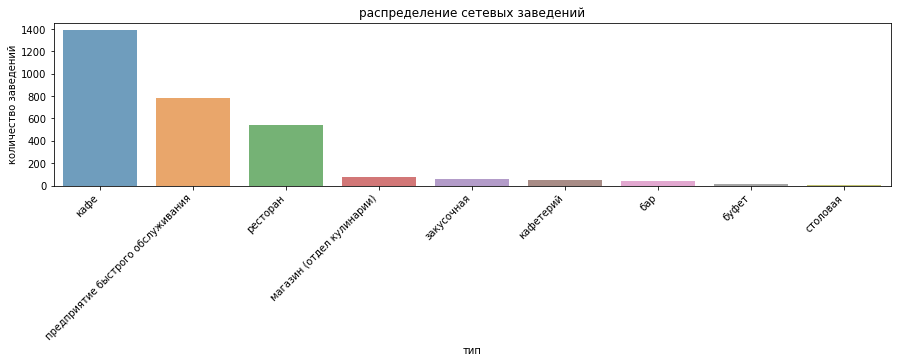

In [23]:
plt.figure(figsize = (15,3))
fig = sns.barplot(data=df_chain_yes, x='index', y = 'object_type', alpha = 0.7)
plt.xlabel("тип")
plt.ylabel("количество заведений")
plt.title('распределение сетевых заведений')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

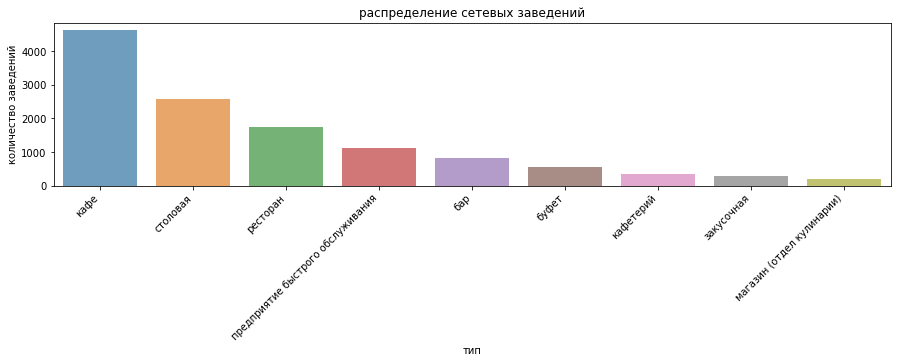

In [24]:
plt.figure(figsize = (15,3))
fig = sns.barplot(data=df_chain_not, x='index', y = 'object_type', alpha = 0.7)
plt.xlabel("тип")
plt.ylabel("количество заведений")
plt.title('распределение сетевых заведений')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

наиболее распространённый тип заведения среди сетевых и несетевых - кафе. Однако среди сетевых и несетевых есть различия - в сетевых преобладают предприятия быстрого обслуживания, в несетевых - столовые.

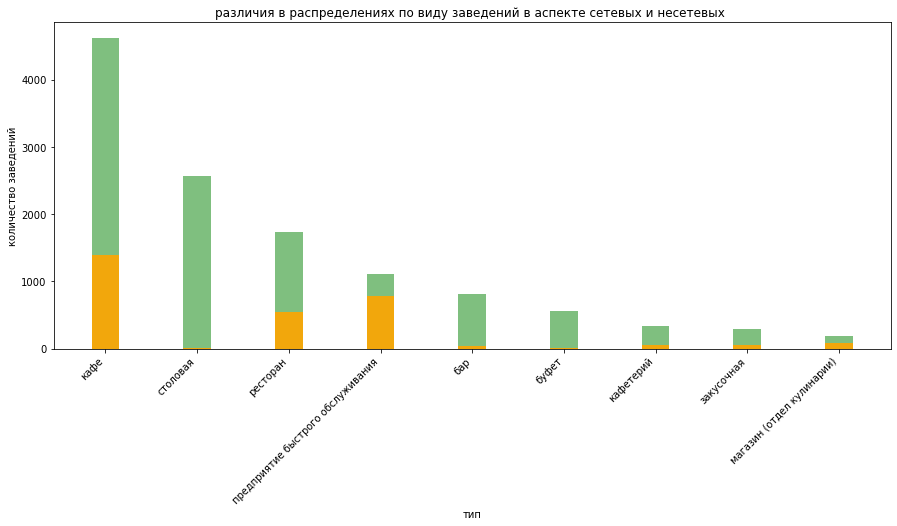

In [25]:
plt.figure(figsize = (15,6))
w = 0.3
plt.bar(df_chain_not['index'], df_chain_not['object_type'], width=w, color = 'green', alpha = 0.5)
plt.bar(df_chain_yes['index'], df_chain_yes['object_type'], width=w,color = 'orange', alpha = 0.9)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel("тип")
plt.ylabel("количество заведений")
plt.title('различия в распределениях по виду заведений в аспекте сетевых и несетевых ')
plt.show()

In [26]:
#переназначим переменные
df_chain_yes = df.query('chain == "да"')
df_chain_not = df.query('chain == "нет"')

рассмотрим распределения по количеству посадочных мест в сетевых и несетевых сегментах

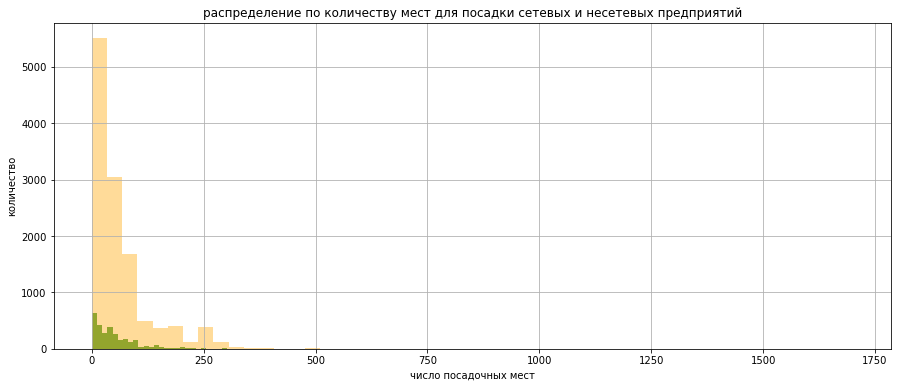

In [27]:
plt.figure(figsize = (15,6))
plt.title('распределение по количеству мест для посадки сетевых и несетевых предприятий')
df_chain_yes['number'].hist(bins = 50, grid = 10, color = 'green', alpha = 0.7) #зелёные - сетевые 
plt.xlabel("число посадочных мест")
plt.ylabel("количество")
df_chain_not['number'].hist(bins = 50, grid = 10, color = 'orange', alpha = 0.4) #оранжевые - несетевые 

plt.show()

In [28]:
print('медианное число посадочных мест сетевых предприятий', df_chain_yes['number'].median())
print('медианное число посадочных мест несетевых предприятий', df_chain_not['number'].median())


медианное число посадочных мест сетевых предприятий 40.0
медианное число посадочных мест несетевых предприятий 40.0


In [29]:
print('наиболее частое число посадочных мест сетевых предприятий', df_chain_yes['number'].mode())
print('наиболее частое число посадочных мест несетевых предприятий', df_chain_not['number'].mode())

наиболее частое число посадочных мест сетевых предприятий 0    0
dtype: int64
наиболее частое число посадочных мест несетевых предприятий 0    0
dtype: int64


Медианные значения количества посадочных мест не отличаются. Однако очевидно, что для сетевых и несетевых предприятий характерно большое количество заведений с малой посадкой (если считать 40 человек - малой вместительностью).

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отличный график! Не так много мест нам требуется в заведении. :)
</div>

Определим среднее количество посадочных мест для каждого объекта.

In [30]:
df_mean_number = df.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index()
df_mean_number



,object_type,number
0,столовая,130.367767
1,ресторан,97.065963
2,буфет,51.487719
3,бар,43.602579
4,кафе,39.886984
5,предприятие быстрого обслуживания,20.787302
6,кафетерий,9.221374
7,закусочная,7.685879
8,магазин (отдел кулинарии),5.610294


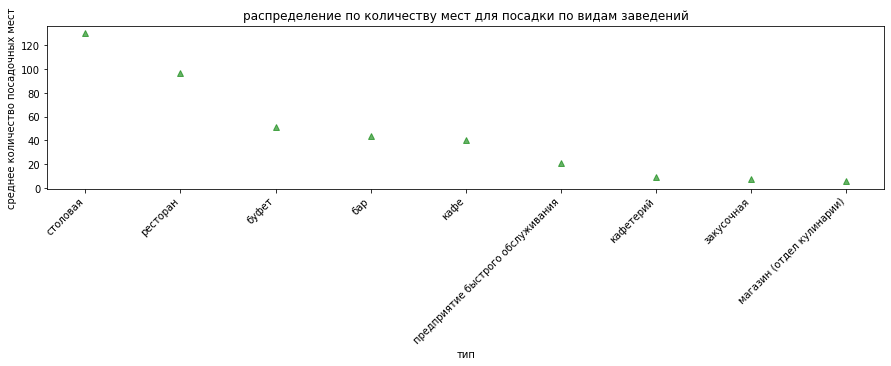

In [31]:
plt.figure(figsize = (15,3))
plt.title('распределение по количеству мест для посадки по видам заведений')
plt.plot(df_mean_number.object_type, df_mean_number.number, 'g^', alpha = 0.6)
plt.xticks(rotation=45,  horizontalalignment='right')
plt.xlabel("тип")
plt.ylabel("среднее количество посадочных мест")
plt.show()

Столовые в среднем обладают самым большиим числом посадочных мест в среднем 130.

In [32]:
df['address_street'] = df['address'].str.extract('(([а-яА-Я1-9\-ё\s"]+)?(улица|километр|территория|аллея|бульвар|деревня|квартал|линия|микрорайон|мост|набережная|парк|переулок|площадь|посёлок|село|проезд|проектируемый проезд|просек|поселение|проспект|тупик|шоссе|зеленоград)([а-яА-Яё1-9\-\s"]+)?)')[0]



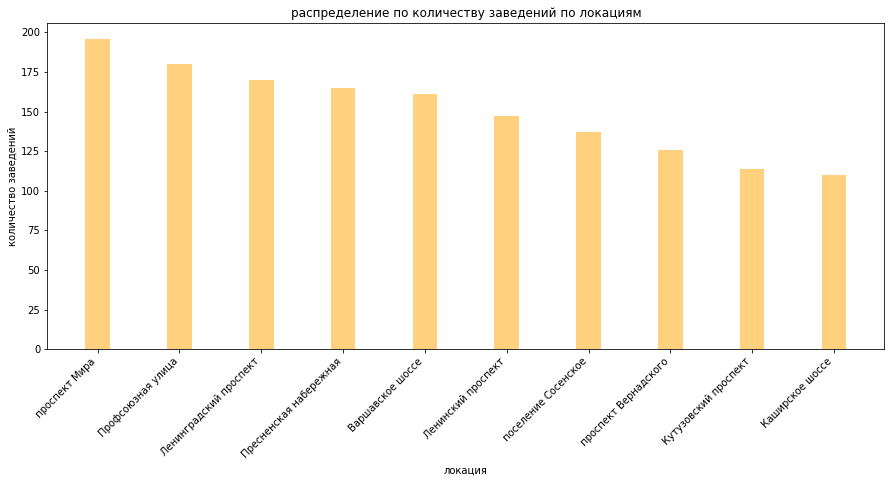

In [33]:
most_density = df['address_street'].value_counts().head(10).to_frame().reset_index()
plt.figure(figsize = (15,6))
plt.title('распределение по количеству заведений по локациям')
plt.xlabel("локация")
plt.ylabel("количество заведений")
plt.bar(most_density['index'], most_density['address_street'], width=w,color = 'orange', alpha = 0.5)
plt.xticks(rotation=45,  horizontalalignment='right')
plt.show()

In [34]:
most_density

,index,address_street
0,проспект Мира,196
1,Профсоюзная улица,180
2,Ленинградский проспект,170
3,Пресненская набережная,165
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,поселение Сосенское,137
7,проспект Вернадского,126
8,Кутузовский проспект,114
9,Каширское шоссе,110


Логично, что наибольшее число заведений расположено на длинных и шоссе, проспектах и магистралях, соприкасающихся с кольцевыми дорогами. 

In [35]:
(df['address_street'].value_counts() == 1).value_counts()

False    1359
True      590
Name: address_street, dtype: int64

Почти 600 улиц с единственным заведением

In [36]:
df['address_street'].value_counts().tail(50)

 2-й Иртышский проезд               1
 Лечебная улица                     1
 Курганская улица                   1
 Олонецкий проезд                   1
 проезд Черепановых                 1
 2-й Новоподмосковный переулок      1
 5-й Монетчиковский переулок        1
 улица Рогожский Посёлок            1
 2-я улица Марьиной Рощи            1
Краснобогатырская улица             1
 Пожарский переулок                 1
 Песчаная улица                     1
 2-й Сельскохозяйственный проезд    1
 Тарусская улица                    1
 3-й Павловский переулок            1
 улица Богородский Вал              1
 2-й Балтийский переулок            1
 проспект 4                         1
 Скатертный переулок                1
 Козицкий переулок                  1
 Садовая-Сухаревская улица          1
Калашный переулок                   1
 2-я улица Бухвостова               1
 Малый Ивановский переулок          1
 улица Можайский Вал                1
 1-й Кожуховский проезд             1
 Бескудников

Объяснимо, что наибольшее число улиц с единственным заведением - это переулки, либо короткие улицы, а также малозаселённые улицы новой Москвы, либо аллеи в парках (типа просек в Сокольниках). 

In [37]:
#загружаем фрейм с районами г. Москвы и улицами
districts = pd.read_csv('https://www.dropbox.com/s/rmraw6o3vtiwdd3/mosgaz-streets.csv?dl=1')

In [38]:
#делаем фрейм: группируем по количеству заведений на улице, при этом фильтруем по единственному заведению на улице 
one_caffee = (df.groupby('address_street').count() == 1).reset_index()

In [39]:
#сделаем фрейм с "одинокими" улицами 
one_caffee_series = one_caffee[one_caffee['id'] == True]['address_street'].to_frame().reset_index()
one_caffee_series['address_street'] = one_caffee_series['address_street'].map(str.strip) #уберём лишний пробельчик в названии улиц
display(one_caffee_series)

,index,address_street
0,2,1-й Балтийский переулок
1,3,1-й Басманный переулок
2,4,1-й Ботанический проезд
3,7,1-й Вешняковский проезд
4,9,1-й Голутвинский переулок
...,...,...
585,1942,улица Знаменка
586,1943,улица Каманина
587,1946,улица Миклухо-Маклая
588,1947,улица Обручева


Мерджим районы с "одинокими" улицами

In [40]:
one_caffee_series_district = one_caffee_series.merge(districts, how = 'left', right_on = 'streetname', left_on = 'address_street', )

In [41]:
one_caffee_series_district = one_caffee_series_district.dropna() #дропаем все пустоты
one_cafee_street_top_10_areas = one_caffee_series_district['area'].value_counts().head(10).to_frame().reset_index()

,index,area
0,Таганский район,32
1,Район Хамовники,28
2,Басманный район,26
3,Тверской район,25
4,Пресненский район,24
5,Район Арбат,19
6,Район Марьина роща,18
7,Мещанский район,18
8,Район Сокольники,15
9,Район Замоскворечье,15


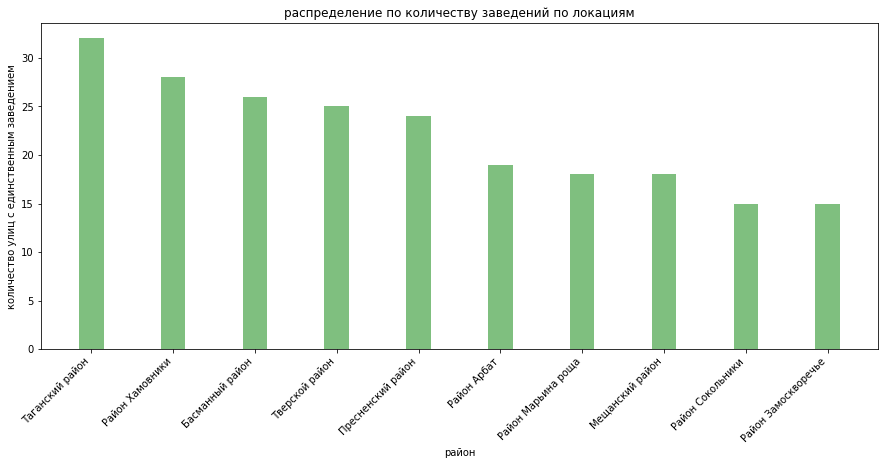

In [42]:
display(one_cafee_street_top_10_areas)
plt.figure(figsize = (15,6))
plt.title('распределение по количеству заведений по локациям')
plt.xlabel("район")
plt.ylabel("количество улиц с единственным заведением")
plt.bar(one_cafee_street_top_10_areas['index'], one_cafee_street_top_10_areas['area'], width=w,color = 'green', alpha = 0.5)
plt.xticks(rotation=45,  horizontalalignment='right')
plt.show()

In [43]:
list_one_cafee = one_caffee[one_caffee['id'] == True]['address_street'].to_list()

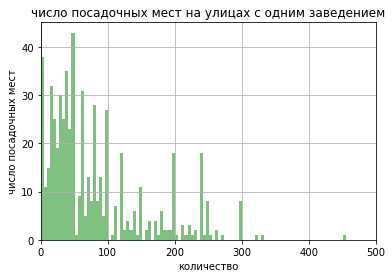

In [44]:
df[df['address_street'].isin(list_one_cafee)]['number'].hist(bins = 100, color = 'green', alpha = 0.5)
plt.title('число посадочных мест на улицах с одним заведением')
plt.xlabel("количество")
plt.ylabel("число посадочных мест")
plt.xlim([0, 500])
plt.show()

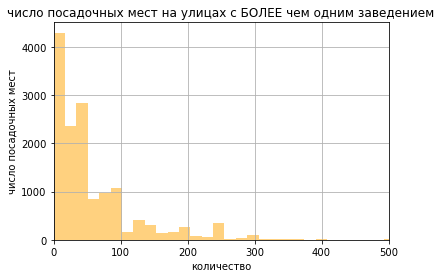

In [45]:
df[df['address_street'].isin(list_one_cafee) == False]['number'].hist(bins = 100, color = 'orange', alpha = 0.5)
plt.title('число посадочных мест на улицах с БОЛЕЕ чем одним заведением')
plt.xlabel("количество")
plt.ylabel("число посадочных мест")
plt.xlim([0, 500])
plt.show()

In [46]:
print('описание распределений на малых улицах с одним заведением:')
print(df[df['address_street'].isin(list_one_cafee)]['number'].describe())
print('')
print('')
print('')
print('описание распределений на больших улицах с множеством заведений:')
print(df[df['address_street'].isin(list_one_cafee) == False]['number'].describe())

описание распределений на малых улицах с одним заведением:
count    590.000000
mean      80.247458
std       74.240213
min        0.000000
25%       30.000000
50%       50.000000
75%      100.000000
max      456.000000
Name: number, dtype: float64



описание распределений на больших улицах с множеством заведений:
count    14592.000000
mean        59.098547
std         74.896908
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64


### Вывод

Описание показало, что среднее число посадочных мест выше на малых улицах. Возможно это связано с стоимостью аренды и наличием банкетных и столовых, существенно влияющих на средние показатели.

## Общий вывод

Кафе для целей нашего перспективного проекта - наиболее предпочтительное заведение. Количество мест, в заведении, необходимое для начала реализации проекта - 40. Локацией-началом реализации проекта следует принять - коммунарку или пресненскую наб. (как наиболее плотные). Для проверки продуктовых гипотез на улицах с плотностью заведений общепита - следует рассмотреть Таганский район, Хамовники, и Басманный. Реализация сетевых проектов потребует поиска локаций с постоянным и ежедневным трафиком - преимущественно бизнес-центры и густонаселённые перспективные спальные районы типа коммунарки (Сосенское).

**Презентация** https://disk.yandex.ru/i/W22fgLLqdnwRlQ